In [1]:
import random
import sequences_creator
import sequences_creator.plotters
from torch_state_control.analysis import AnalysisPresenter
from networks.continuer import Continuer
from dataset_partitions import train_set, dev_set, test_set
from network_interface import NetworkInterface
import plotters

# Continuer Network

## The data

Each sample in the dataset is a sequence of real numbers *of variable length*. To be predicted is the value that follows the last known value of the sequence.

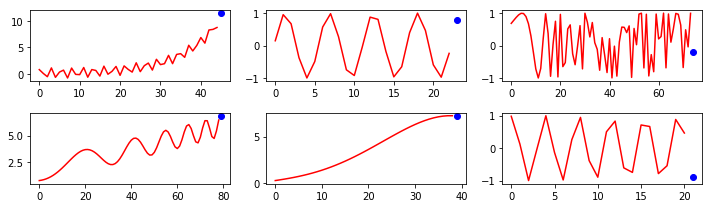

In [2]:
dataset = sequences_creator.create_dataset(set_size=100, length_range=(10, 100))
random_samples = random.sample((dataset), 6)
sequences_creator.plotters.plot_records(random_samples)

## The network

In [3]:
network = Continuer()
network.load_checkpoint(7)
network_interface = NetworkInterface(network=network)
analysis_presenter = AnalysisPresenter(name=network.name)

The network consits of a GRU RNN, that encodes the sequence into a 20-dimensional vector. A fully connected layer takes that vector as input to return the prediction.

In [4]:
print(network)

Continuer(
  (encoder): GRU(1, 20, num_layers=2, batch_first=True)
  (decoder): Sequential(
    (0): Linear(in_features=20, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=1, bias=True)
  )
)


## Performance

Let's take a look at the performance *on our test set*, i.e. the set that hasn't been used in any way during training.

In [5]:
predictions = network_interface.performance_on_samples(test_set)
len(predictions)

10000

The predictions are sorted by loss. Let's plot the losses to see more.

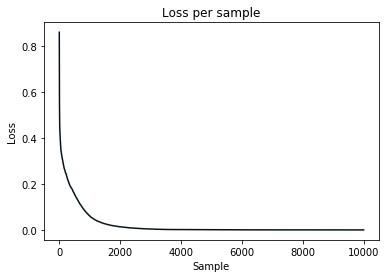

In [6]:
plotters.plot_loss_per_sample(predictions)

Apparantly the algorithm performs relatively well on the samples from 3000 to 10000 (70% of all samples). The **worst of these 70%** look like this:

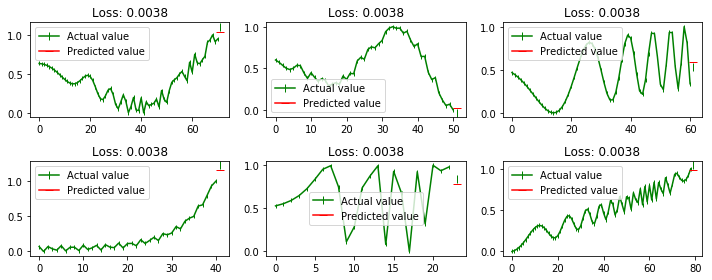

In [10]:
plotters.plot_samples([predictions[3000], predictions[3001], predictions[3002], predictions[3003], predictions[3004], predictions[3005]])

The samples the algorithm performs **best** on:

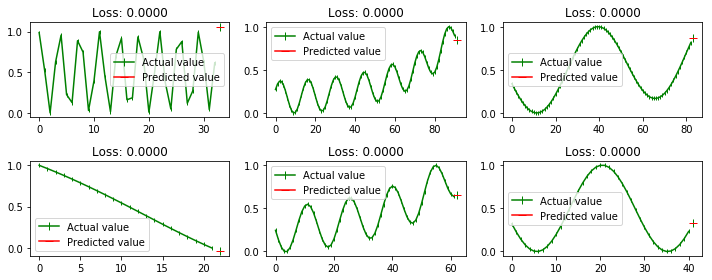

In [8]:
plotters.plot_samples([predictions[-1], predictions[-2], predictions[-3], predictions[-4], predictions[-5], predictions[-6]])

The samples the algorithm performs *worst* on:

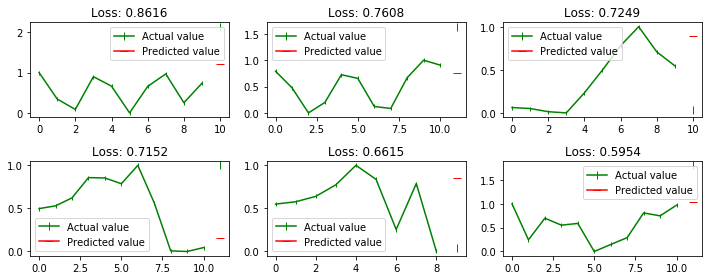

In [9]:
plotters.plot_samples([predictions[0], predictions[1], predictions[2], predictions[3], predictions[4], predictions[5]])